In [2132]:
import pandas as pd
import getpass
import sqlalchemy as sa
import numpy as np
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Importing Dataset.

In [2133]:
hp_df_org = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/Houseprices/Data/house_price_df.csv')
hp_df = hp_df_org

## EDA

In [2134]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The Dataset consists of 21597 Houses containing 21 features. Price is to be the predicted variables. 

In [2135]:
hp_df[['bedrooms', 'sqft_living',  'sqft_lot', 'yr_built', 'price']].describe()

,bedrooms,sqft_living,sqft_lot,yr_built,price
count,21597.000000,21597.000000,2.159700e+04,21597.000000,2.159700e+04
mean,3.373200,2080.321850,1.509941e+04,1970.999676,5.402966e+05
std,0.926299,918.106125,4.141264e+04,29.375234,3.673681e+05
min,1.000000,370.000000,5.200000e+02,1900.000000,7.800000e+04
25%,3.000000,1430.000000,5.040000e+03,1951.000000,3.220000e+05
50%,3.000000,1910.000000,7.618000e+03,1975.000000,4.500000e+05
75%,4.000000,2550.000000,1.068500e+04,1997.000000,6.450000e+05
max,33.000000,13540.000000,1.651359e+06,2015.000000,7.700000e+06


The average house has about 3 bedrooms, 2080 sqft of living area, a lot size of 15000 sqft, was built in 1970 and has a price of 540000 $. The mean and the median differ alot in the variable sqft lot, where the median is much lower then the mean. This leads to the conculusion that many houses don't have a big lot but a few house with a big lot change the distribution.

In [2136]:
print(hp_df['date'].min(), hp_df['date'].max())

2014-05-02 2015-05-27


The date variable displays the date when the house was sold. Data is between May 2014 and May 2015. 

In [2137]:
hp_df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Most houses have 2,5 bathrooms, a lot also only . A view outliers have a very high number of bathrooms.

## Location

For the location the datasets offers three features. Latitute and Longitude (only useful combined) and zipcodes. Let's look at both of them.

In [2138]:
# sns.jointplot(data=hp_df, x='long', y='lat', hue = 'sqft_lot').set(title='Lot size and geographical location')

Looking at the geographical location of the houses and displaying the lot size it is visual, that the properties at the are outskirts and the countryside get bigger. 

In [2139]:
# sns.jointplot(data=hp_df, x='long', y='lat', hue = 'zipcode').set(title='Zipcode and geographical location')

The zipcodes are not in a logicla order so the variables should not be used as a numerical variables.
And alternative idea would be to use the travel distance from the house to the city center.

In [2140]:
distance = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/Houseprices/Data/distance.csv')

In [2141]:
hp_df['distanceM'] = distance['DistanceM'].astype('float64')

## Year renovated

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

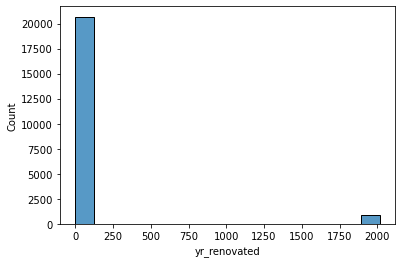

In [2142]:
sns.histplot(data=hp_df, x='yr_renovated')

The year renovated displays a 0 if the house was not yet renovated. This is not useful information in a linear regression. 

Workaround:

introduce boolean variable: Renovated: Yes/N0
Put zero values as No  


In [2143]:
hp_df['renovated'] = bool

In [2144]:
hp_df['yr_renovated'] == 0

0         True
1        False
2         True
3         True
4         True
         ...  
21592     True
21593     True
21594     True
21595     True
21596     True
Name: yr_renovated, Length: 21597, dtype: bool

In [2145]:
hp_df.loc[hp_df['yr_renovated'] == 0, 'renovated'] = False

In [2146]:
hp_df.loc[hp_df['yr_renovated'] != 0, 'renovated'] = True

## Basement

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

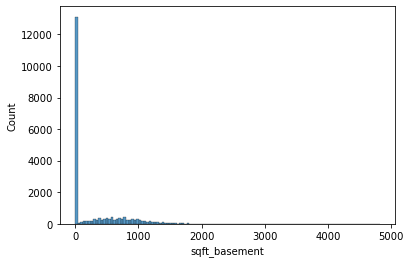

In [2147]:
sns.histplot(data=hp_df, x='sqft_basement')

Most Houses don't have a basement, so a dummy will be introduced checking for basement or not:

In [2148]:
hp_df.loc[hp_df['sqft_basement'] == 0, 'basement'] = False
hp_df.loc[hp_df['sqft_basement'] != 0, 'basement'] = True

## Grade

Bin grade to have a better classification:

In [2149]:
grade_mean = hp_df['grade'].mean()

In [2150]:
for i in range(0,len(hp_df)):
    if hp_df['grade'][i]<grade_mean:
        hp_df['grade'][i] = 'below_avg'
    else:
        hp_df['grade'][i] = 'avg_or_better'
        

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20060\79735779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp_df['grade'][i] = 'below_avg'


<AxesSubplot:xlabel='grade', ylabel='Count'>

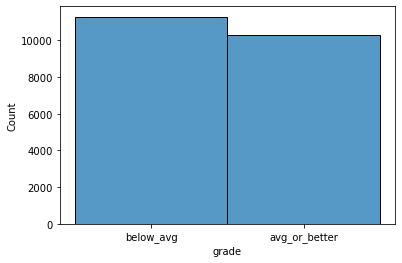

In [2151]:
sns.histplot(hp_df['grade'])

## Floors

<AxesSubplot:xlabel='floors', ylabel='Count'>

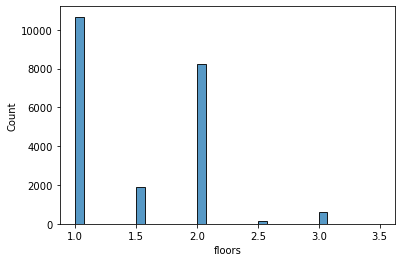

In [2152]:
sns.histplot(hp_df['floors'])

In [2153]:
hp_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

bin floors to be more equal

In [2154]:
for i in range(0, len(hp_df)):
    if hp_df.loc[i, 'floors'] <= 1.0:
        hp_df.loc[i,'floors'] = 'one'
    else: 
        hp_df.loc[i, 'floors'] = 'more_than_one'

<AxesSubplot:xlabel='floors', ylabel='Count'>

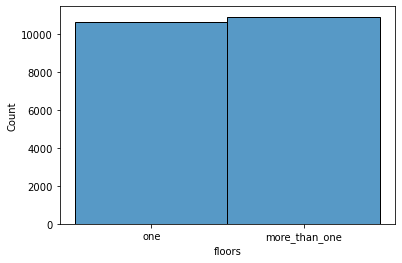

In [2155]:
sns.histplot(hp_df['floors'])

## Dropping columns:

For now the columns Unnamed, id, date and long, lat will be dropped from the dataframe.

In [2156]:
col_drop = ['Unnamed: 0',\
            'id',\
            'date',\
           'long',\
            'sqft_basement',\
            'yr_renovated',\
           'lat']   
# 'Unnamed: 0' : id from import without information
# 'id': random or consequtive values without values
# 'date': probably the date the house was added to the database, no additional information for houseprice
# 'lang', 'lat': Geografical data, not usable in linear regression like this, can be converted to zones using knn. 
#    Task for later. But zip codes are enough, probably


In [2157]:
hp_df = hp_df.drop(col_drop, axis= 1)

## Changing datatypes


The format of the features are mostly numerical (int or float). Many of the variables have to be transformed to category to give meaningful results in a regression.
These are:

'zipcode, 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade'

In [2158]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  object 
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  sqft_living15  21597 non-null  int64  
 13  sqft_lot15     21597 non-null  int64  
 14  price          21597 non-null  int64  
 15  distanceM      21597 non-null  float64
 16  renovated      21597 non-null  object 
 17  basement       21597 non-null  object 
dtypes: flo

In [2159]:
# From the pairplot we can see which columns are categorical/dummies:
#  bderooms, bathrooms, floors, waterfront, view, condition, grade
ordinal_var = ['zipcode', 'floors', 'waterfront', 'view', 'condition', 'grade']
hp_df[ordinal_var] = hp_df[ordinal_var].astype('category')
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21597 non-null  int64   
 1   bathrooms      21597 non-null  float64 
 2   sqft_living    21597 non-null  int64   
 3   sqft_lot       21597 non-null  int64   
 4   floors         21597 non-null  category
 5   waterfront     21597 non-null  category
 6   view           21597 non-null  category
 7   condition      21597 non-null  category
 8   grade          21597 non-null  category
 9   sqft_above     21597 non-null  int64   
 10  yr_built       21597 non-null  int64   
 11  zipcode        21597 non-null  category
 12  sqft_living15  21597 non-null  int64   
 13  sqft_lot15     21597 non-null  int64   
 14  price          21597 non-null  int64   
 15  distanceM      21597 non-null  float64 
 16  renovated      21597 non-null  object  
 17  basement       21597 non-null  

In [2160]:
hp_df.shape

(21597, 18)

## Checking correlation of numerical variables

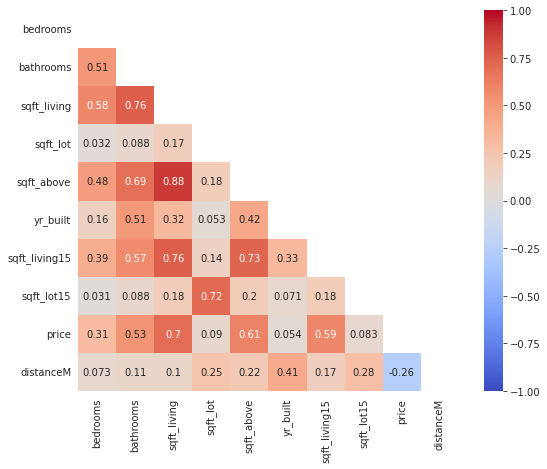

In [2161]:
corr = hp_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

The features should not be correlated in order to fulfill the asumtions of linear regression.
As expected there is a lot of correlation between sqf_above, sqf_living and other measures of size. 
- First: Drop sqf_above

In [2162]:
corr_matrix=hp_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
corr_var = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
hp_df = hp_df.drop(corr_var, axis= 1)
hp_df.shape

(21597, 17)

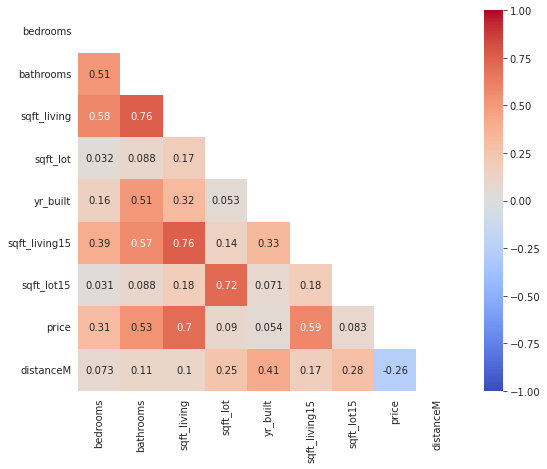

In [2163]:
corr = hp_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

The new dataframe does not contain anymore variables with a higher correlation than 0.8, but some variable still have high correlation which could be analysed later.

# Normalization

## Histograms
To check for the assumtion of normal distributions we check the histograms of the numerical variables

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'distanceM'}>]], dtype=object)

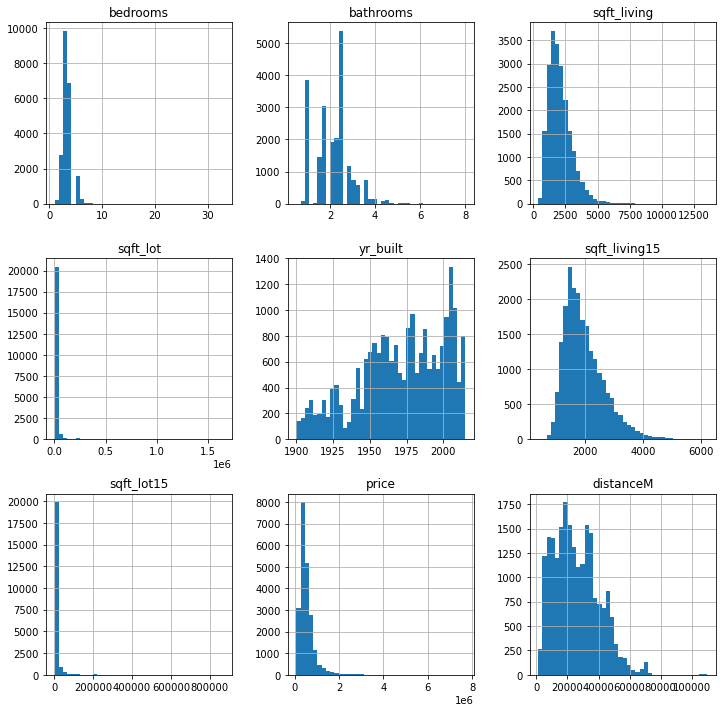

In [2164]:
hp_df.select_dtypes(['int64','float']).hist(figsize=(12,12), bins=40)


All numerical varibales are non-normaly distributed and need to be transformed. 

## Transforming to normal distribution

In [2165]:
hp_df.select_dtypes(['int64','float']).columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'price', 'distanceM'],
      dtype='object')

In [2166]:
# List of variables names to be transformed: 
to_trans =  {'sqft_living': 'qt',\
             'sqft_lot': 'qt',\
             'yr_built': 'qt',\
             'sqft_living15': 'qt',\
             'sqft_lot15': 'qt',\
            'bedrooms': 'qt',\
            'bathrooms': 'qt',\
            'distanceM': 'qt'}

,price,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_living15_transformed,sqft_lot15_transformed,bedrooms_transformed,bathrooms_transformed,distanceM_transformed
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,0.000009,-0.000043,-0.007133,0.000007,-0.000060,-0.015954,0.014393,0.000292
std,3.673681e+05,0.999686,0.999566,1.046026,0.999868,1.000081,1.003797,0.950943,1.001638
min,7.800000e+04,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,3.220000e+05,-0.667419,-0.676854,-0.689529,-0.665852,-0.673702,-0.346817,-0.469603,-0.674452
50%,4.500000e+05,-0.003764,0.000418,0.003764,0.001255,0.000000,-0.346817,0.067799,-0.000254
75%,6.450000e+05,0.675277,0.674710,0.681594,0.670557,0.674476,0.678433,0.520661,0.674567
max,7.700000e+06,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


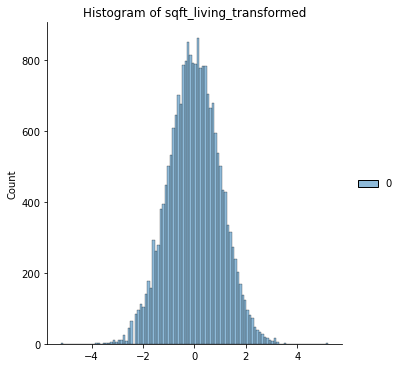

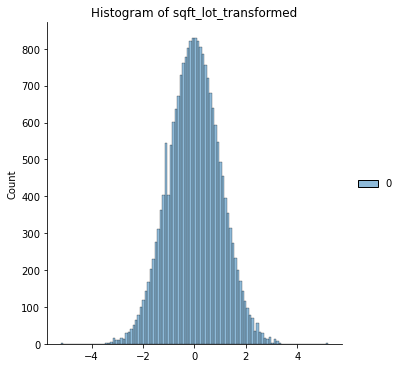

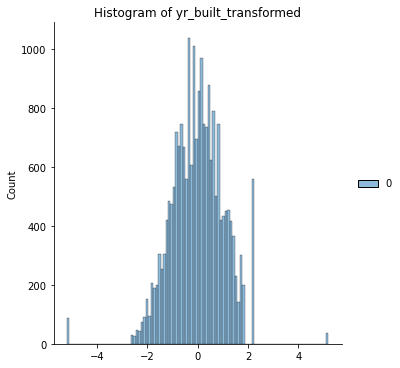

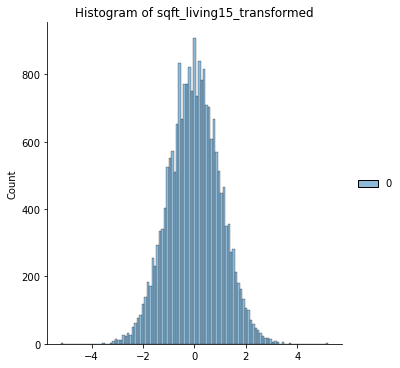

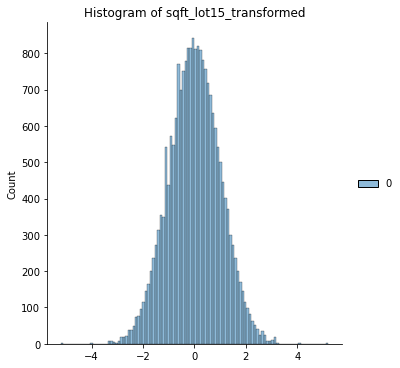

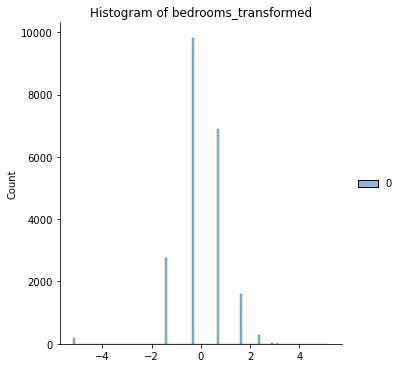

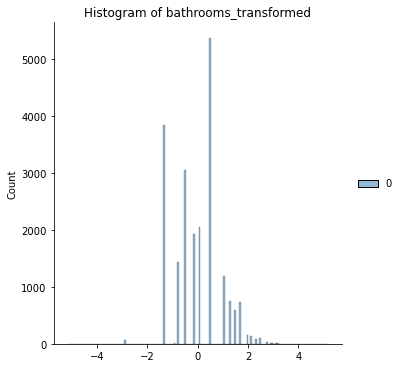

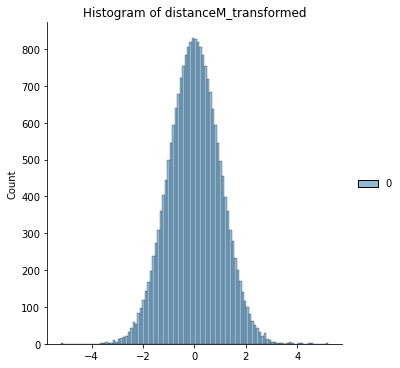

In [2167]:

pt = PowerTransformer()
qt = QuantileTransformer(output_distribution="normal")

transformed_cols = []
for i in to_trans.keys():
    if list(to_trans.values())[0] == 'pt':
        transformed = pt.fit_transform(hp_df[i].to_numpy().reshape(-1,1))
    elif list(to_trans.values())[0] == 'qt':
        transformed = qt.fit_transform(hp_df[i].to_numpy().reshape(-1,1))
    else: 
        print('no transformer could be identified')
    col_name = i+'_transformed'
    sns.displot(transformed).set(title=f'Histogram of {col_name}')
    hp_df[col_name] = transformed
    transformed_cols = transformed_cols + [col_name]
    hp_df = hp_df.drop(i, axis= 1)
    
    
hp_df.describe()

In [2168]:
transformed_cols

['sqft_living_transformed',
 'sqft_lot_transformed',
 'yr_built_transformed',
 'sqft_living15_transformed',
 'sqft_lot15_transformed',
 'bedrooms_transformed',
 'bathrooms_transformed',
 'distanceM_transformed']

In [2169]:
hp_df.describe()

,price,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_living15_transformed,sqft_lot15_transformed,bedrooms_transformed,bathrooms_transformed,distanceM_transformed
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,0.000009,-0.000043,-0.007133,0.000007,-0.000060,-0.015954,0.014393,0.000292
std,3.673681e+05,0.999686,0.999566,1.046026,0.999868,1.000081,1.003797,0.950943,1.001638
min,7.800000e+04,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,3.220000e+05,-0.667419,-0.676854,-0.689529,-0.665852,-0.673702,-0.346817,-0.469603,-0.674452
50%,4.500000e+05,-0.003764,0.000418,0.003764,0.001255,0.000000,-0.346817,0.067799,-0.000254
75%,6.450000e+05,0.675277,0.674710,0.681594,0.670557,0.674476,0.678433,0.520661,0.674567
max,7.700000e+06,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [2170]:
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   floors                     21597 non-null  category
 1   waterfront                 21597 non-null  category
 2   view                       21597 non-null  category
 3   condition                  21597 non-null  category
 4   grade                      21597 non-null  category
 5   zipcode                    21597 non-null  category
 6   price                      21597 non-null  int64   
 7   renovated                  21597 non-null  object  
 8   basement                   21597 non-null  object  
 9   sqft_living_transformed    21597 non-null  float64 
 10  sqft_lot_transformed       21597 non-null  float64 
 11  yr_built_transformed       21597 non-null  float64 
 12  sqft_living15_transformed  21597 non-null  float64 
 13  sqft_lot15_transformed     2159

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living_transformed'}>,
        <AxesSubplot:title={'center':'sqft_lot_transformed'}>],
       [<AxesSubplot:title={'center':'yr_built_transformed'}>,
        <AxesSubplot:title={'center':'sqft_living15_transformed'}>,
        <AxesSubplot:title={'center':'sqft_lot15_transformed'}>],
       [<AxesSubplot:title={'center':'bedrooms_transformed'}>,
        <AxesSubplot:title={'center':'bathrooms_transformed'}>,
        <AxesSubplot:title={'center':'distanceM_transformed'}>]],
      dtype=object)

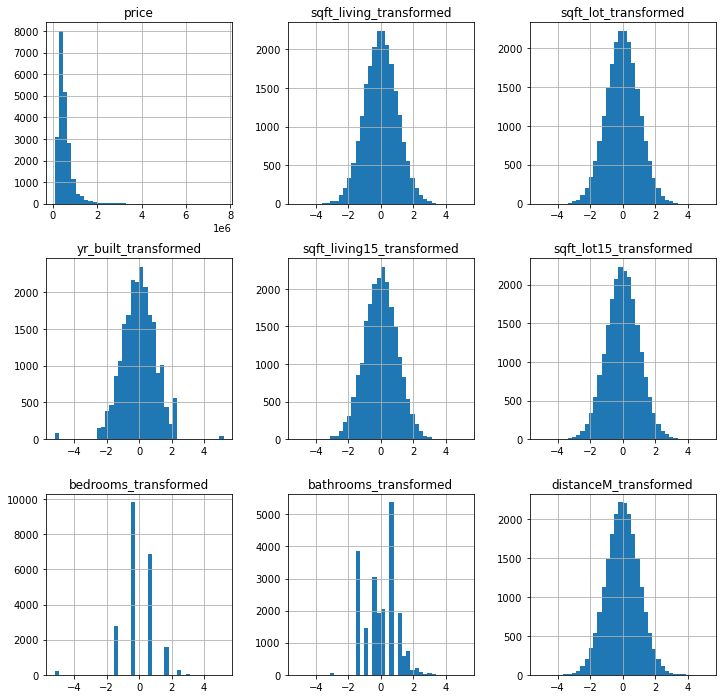

In [2171]:
hp_df.select_dtypes(['int', 'float64']).hist(figsize=(12,12), bins=40)

## Remove outliers

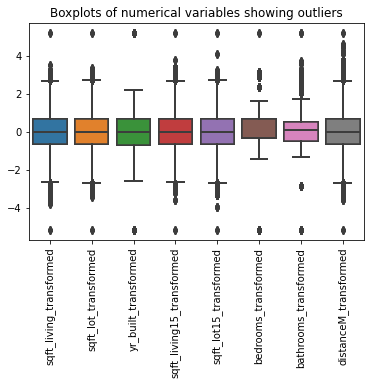

In [2172]:
for i in transformed_cols:
    sns.boxplot(data=hp_df[transformed_cols]).set(title='Boxplots of numerical variables showing outliers')
    plt.xticks(rotation=90)

In [2173]:
 len_before = hp_df.shape[0]

In [2174]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-2*iqr
    fence_high = q3+2*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#for i in transformed_cols: 
hp_df = remove_outlier(hp_df, i )

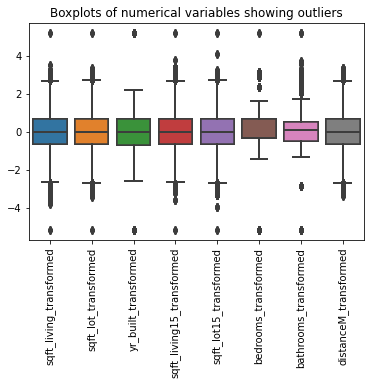

In [2175]:
for i in transformed_cols:
    sns.boxplot(data=hp_df[transformed_cols]).set(title='Boxplots of numerical variables showing outliers')
    plt.xticks(rotation=90)

In [2176]:
len_after = hp_df.shape[0]

In [2177]:
print(f'Of the original dataset {round(len_after/len_before * 100, 2)}% of rows remain')

Of the original dataset 99.89% of rows remain


## One-hot encode categorical variables

In [2178]:
col_names_object = list(hp_df.select_dtypes("object").columns)
col_names_object.extend(hp_df.select_dtypes("category").columns)
col_names_object

['renovated',
 'basement',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode']

In [2179]:
cat_features =  pd.get_dummies(hp_df[col_names_object] , drop_first=True)

In [2180]:
hp_df = hp_df.drop(col_names_object, axis = 1)

In [2181]:
hp_df[cat_features.columns] = cat_features

In [2182]:
list(hp_df.columns)

['price',
 'sqft_living_transformed',
 'sqft_lot_transformed',
 'yr_built_transformed',
 'sqft_living15_transformed',
 'sqft_lot15_transformed',
 'bedrooms_transformed',
 'bathrooms_transformed',
 'distanceM_transformed',
 'renovated_True',
 'basement_True',
 'floors_one',
 'waterfront_1',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_below_avg',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zip

## 1st Model only using numerical variables

###  1) Split X-y

In [2183]:
X=hp_df.drop('price', axis=1)
y=hp_df['price']


In [2184]:
X

,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_living15_transformed,sqft_lot15_transformed,bedrooms_transformed,bathrooms_transformed,distanceM_transformed,renovated_True,basement_True,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-1.109378,-0.517790,-0.549616,-1.037937,-0.517790,-0.346817,-1.324958,-0.395662,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.694311,-0.115464,-0.689529,-0.247134,0.007616,-0.346817,0.067799,-0.694813,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-2.131682,0.562796,-1.118711,1.064091,0.154186,-1.453280,-1.324958,0.088916,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.051460,-0.718462,-0.247134,-0.985610,-0.744694,0.678433,1.258508,-0.410235,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.293986,0.128003,0.368215,-0.062770,-0.040336,-0.346817,-0.163824,0.546908,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.509202,-2.132221,1.529558,-0.573115,-1.831578,-0.346817,0.520661,-1.087218,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0.436240,-0.475178,2.183092,-0.012546,-0.165095,0.678433,0.520661,-0.598796,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,-1.428482,-1.837261,1.529558,-2.043115,-1.644085,-1.453280,-2.877846,-1.173567,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,-0.406079,-1.515547,1.008294,-0.862544,-2.068024,-0.346817,0.520661,0.346817,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2185]:
X=X.drop(cat_features.columns, axis=1)

In [2186]:
X.columns

Index(['sqft_living_transformed', 'sqft_lot_transformed',
       'yr_built_transformed', 'sqft_living15_transformed',
       'sqft_lot15_transformed', 'bedrooms_transformed',
       'bathrooms_transformed', 'distanceM_transformed'],
      dtype='object')

In [2187]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

In [2188]:
X_train

,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_living15_transformed,sqft_lot15_transformed,bedrooms_transformed,bathrooms_transformed,distanceM_transformed
21149,0.345485,-1.401177,1.744448,0.593940,-1.401043,-0.346817,0.520661,0.347915
8873,-0.060256,0.391233,0.599937,-0.573115,0.161705,-0.346817,0.067799,1.284241
8007,0.397918,0.675927,-0.295296,0.257495,0.710300,1.620592,0.520661,0.051162
15552,1.072973,0.864061,-0.080379,0.828465,0.992924,-0.346817,1.040090,-0.025626
16878,-0.812654,0.049510,-0.832006,0.884593,0.059801,-1.453280,-1.324958,-0.276678
...,...,...,...,...,...,...,...,...
16321,1.464186,0.446266,0.749670,0.971436,0.523537,0.678433,1.721914,-0.563727
79,1.425011,1.585639,0.875354,1.684464,1.697533,0.678433,0.520661,1.735890
12131,0.803958,1.523921,0.337506,0.905189,1.561765,0.678433,0.067799,2.038188
14163,0.426601,-0.524638,1.008294,0.451469,-0.454416,-0.346817,1.721914,0.554075


### Standardize

In [2189]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train)

In [2190]:
X_train.shape

(15101, 8)

In [2191]:
X_test_scaled=std_scaler.transform(X_test)
X_test_scaled.shape

(6472, 8)

## Linear Regression

In [2192]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2464.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:00:38   Log-Likelihood:            -2.0863e+05
No. Observations:               15101   AIC:                         4.173e+05
Df Residuals:                   15092   BIC:                         4.174e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.404e+05   1970.513    274.225      0.0

In [2193]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [2194]:
model.coef_

array([ 160426.42856969,   34232.08574941,  -14470.74463821,
         72251.04057971,   23899.21484113,  -49470.586167  ,
         67644.4085629 , -161224.1432687 ])

In [2195]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [2196]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

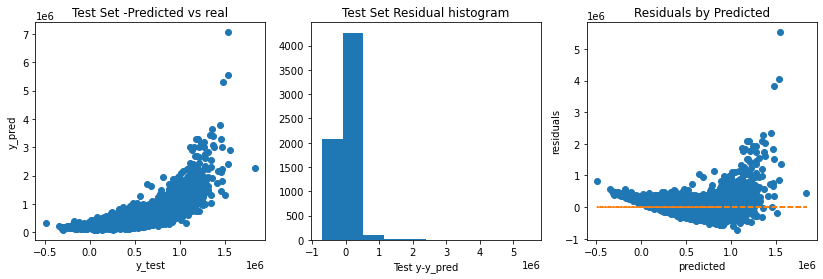

In [2197]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [2198]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  60220130582.27702
MAE test:  152088.48327280287
MSE train:  58601061569.30319
RMSE test:  389.9852346856261
R2_test:  0.5524363857689365
R2_train:  0.5663344379339506
MSE train - MSE test:  -1619069012.9738312
R2_test/R2_train:  0.9754596379204562
Adj_R2: 0.551882384699178


In [2199]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [2200]:
features_importances

,Attribute,Importance
7,distanceM_transformed,161224.143269
0,sqft_living_transformed,160426.428570
3,sqft_living15_transformed,72251.040580
6,bathrooms_transformed,67644.408563
5,bedrooms_transformed,49470.586167
1,sqft_lot_transformed,34232.085749
4,sqft_lot15_transformed,23899.214841
2,yr_built_transformed,14470.744638


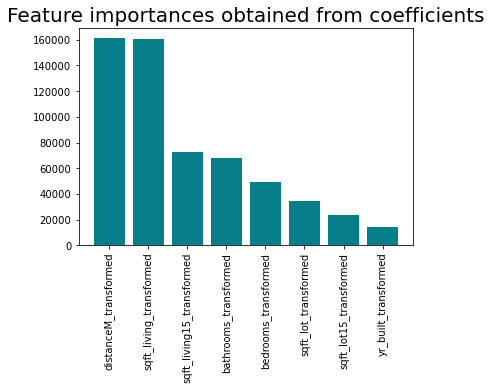

In [2201]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## 2nd model including categorical variables

In [2202]:
def Xy_split(df, output_col):
    """ Split the dataset into:
        X = dataframe of input variables
        y = predicted variable
    """
    X=df.drop(output_col, axis=1)
    y=df[output_col]
    print(X.columns)
    return X, y

X,y = Xy_split(hp_df, 'price') 

Index(['sqft_living_transformed', 'sqft_lot_transformed',
       'yr_built_transformed', 'sqft_living15_transformed',
       'sqft_lot15_transformed', 'bedrooms_transformed',
       'bathrooms_transformed', 'distanceM_transformed', 'renovated_True',
       'basement_True', 'floors_one', 'waterfront_1', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_below_avg', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
    

In [2203]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=100)

In [2204]:
std_scaler=StandardScaler().fit(X_train.select_dtypes(['int', 'float64']))   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train.select_dtypes(['int', 'float64']))

X_test_scaled=std_scaler.transform(X_test.select_dtypes(['int', 'float64']))
X_test_scaled.shape

(6472, 8)

In [2205]:
X_train

,sqft_living_transformed,sqft_lot_transformed,yr_built_transformed,sqft_living15_transformed,sqft_lot15_transformed,bedrooms_transformed,bathrooms_transformed,distanceM_transformed,renovated_True,basement_True,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
21149,0.345485,-1.401177,1.744448,0.593940,-1.401043,-0.346817,0.520661,0.347915,0,1,...,0,0,0,0,0,0,0,0,0,0
8873,-0.060256,0.391233,0.599937,-0.573115,0.161705,-0.346817,0.067799,1.284241,0,0,...,0,0,0,0,0,0,0,0,0,0
8007,0.397918,0.675927,-0.295296,0.257495,0.710300,1.620592,0.520661,0.051162,0,1,...,0,0,0,0,0,0,0,0,0,0
15552,1.072973,0.864061,-0.080379,0.828465,0.992924,-0.346817,1.040090,-0.025626,0,1,...,0,0,0,0,0,0,0,0,0,0
16878,-0.812654,0.049510,-0.832006,0.884593,0.059801,-1.453280,-1.324958,-0.276678,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16321,1.464186,0.446266,0.749670,0.971436,0.523537,0.678433,1.721914,-0.563727,0,0,...,0,0,0,0,0,0,0,0,0,0
79,1.425011,1.585639,0.875354,1.684464,1.697533,0.678433,0.520661,1.735890,0,0,...,0,0,0,0,0,0,0,0,0,0
12131,0.803958,1.523921,0.337506,0.905189,1.561765,0.678433,0.067799,2.038188,0,0,...,0,0,0,0,0,0,0,0,0,0
14163,0.426601,-0.524638,1.008294,0.451469,-0.454416,-0.346817,1.721914,0.554075,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2206]:
X_train_scaled = np.concatenate((X_train_scaled, np.asarray(X_train[list(cat_features.columns)])), axis = 1) 

X_test_scaled = np.concatenate((X_test_scaled, np.asarray(X_test[list(cat_features.columns)])), axis =1)
print(X_train_scaled.shape, X_test_scaled.shape)

(15101, 90) (6472, 90)


In [2207]:
print(y_train.shape, y_test.shape)

(15101,) (6472,)


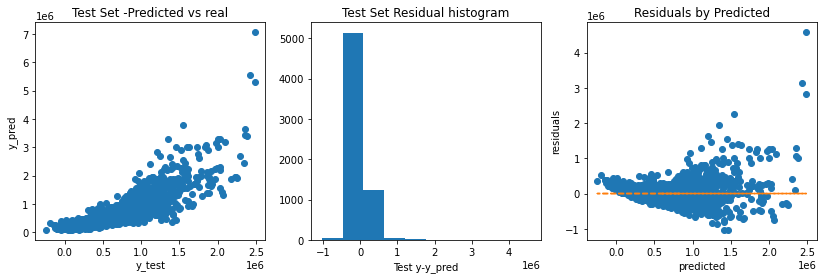

In [2208]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train) 


y_pred=model.predict(X_test_scaled)   # model prediction
y_pred_train=model.predict(X_train_scaled)


result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [2209]:
y_test

8401     699000
14082    275000
18910    225000
9107     399990
19272    316000
          ...  
20460    375000
2732     700000
10415    447000
4121     346500
4432     675000
Name: price, Length: 6472, dtype: int64

In [2210]:
#sns.jointplot(y_pred, y_test)

In [2211]:
#sns.jointplot(x=y_pred,y = (y_test - y_pred))

In [2212]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  35492297532.0169
MAE test:  110090.70975488334
MSE train:  34438249686.851295
RMSE test:  331.7992009557638
R2_test:  0.7362167632783453
R2_train:  0.745146546716442
MSE train - MSE test:  -1054047845.1656036
R2_test/R2_train:  0.9880160708286891
Adj_R2: 0.7324962662865024


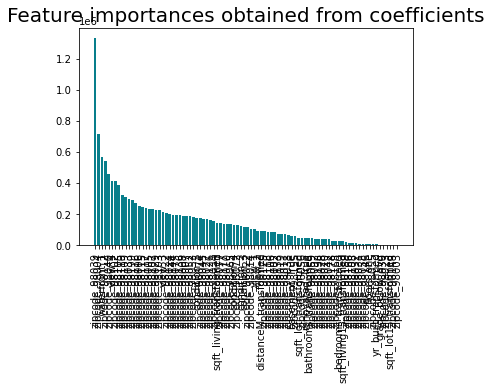

<Figure size 60000x60000 with 0 Axes>

In [2213]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.figure(figsize=(200, 200), dpi=300)
plt.show()

In [2214]:
features_importances.nlargest(20, 'Importance')

,Attribute,Importance
44,zipcode_98039,1.332912e+06
23,zipcode_98004,7.169140e+05
11,waterfront_1,5.671058e+05
68,zipcode_98112,5.447150e+05
45,zipcode_98040,4.575146e+05
15,view_4,4.144267e+05
61,zipcode_98102,4.121420e+05
63,zipcode_98105,3.903103e+05
73,zipcode_98119,3.238063e+05
67,zipcode_98109,3.104890e+05


## Get P-values from model 

To filter the significant columns we get the p-value from the linear regression. If it is higher than 0.5 the column is dropped.

In [2215]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     487.6
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:00:42   Log-Likelihood:            -2.0462e+05
No. Observations:               15101   AIC:                         4.094e+05
Df Residuals:                   15010   BIC:                         4.101e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.66e+05   4.34e+04      6.123      0.0

In [2216]:
sign_cols = model.pvalues[1:len(model.pvalues)]  # remove constant

sign_cols

x1     0.000000e+00
x2     2.191709e-30
x3     2.910890e-03
x4     6.883420e-23
x5     6.630025e-01
           ...     
x86    3.655699e-10
x87    1.452842e-01
x88    3.501639e-01
x89    1.872653e-02
x90    2.182840e-28
Length: 90, dtype: float64

Pseudo-Code: for i in range(0, len(X.column)) drop X.columns[i] if sign_cols[i]> 0.05
        

In [2217]:
sign_cols = pd.DataFrame([sign_cols])
sign_cols

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90
0,0.0,2.191709e-30,0.002911,6.883420e-23,0.663003,2.863272e-36,1.723848e-61,1.900021e-32,1.622785e-08,9.758883e-55,...,0.673414,0.961822,0.002158,0.450554,0.190981,3.655699e-10,0.145284,0.350164,0.018727,2.182840e-28


In [2218]:
X_col_list = X.columns
X_dropped_p = X
for i in range(0,len(X.columns)):
    if sign_cols.iloc[0,i]>0.05:
        X_dropped_p = X_dropped_p.drop(X_col_list[i], axis=1)

In [2219]:
print(f'From orginally {X.shape[1]} features {X_dropped_p.shape[1]} features remain.')

From orginally 90 features 72 features remain.


## 3d linear Model only including variabels that had a siginificant p-value in the 2s Model

In [2220]:
X_train, X_test, y_train, y_test=train_test_split(X_dropped_p, y, test_size=.30,random_state=100)

In [2221]:
X_train_num = X_train.select_dtypes(['float64'])
X_test_num = X_test.select_dtypes(['float64'])
X_train_cat = X_train.select_dtypes(['uint8'])
X_test_cat = X_test.select_dtypes(['uint8'])
print(X_train_num.shape, X_test_num.shape, X_train_cat.shape, X_test_cat.shape)

(15101, 7) (6472, 7) (15101, 65) (6472, 65)


In [2222]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15101 entries, 21149 to 5649
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sqft_living_transformed    15101 non-null  float64
 1   sqft_lot_transformed       15101 non-null  float64
 2   yr_built_transformed       15101 non-null  float64
 3   sqft_living15_transformed  15101 non-null  float64
 4   bedrooms_transformed       15101 non-null  float64
 5   bathrooms_transformed      15101 non-null  float64
 6   distanceM_transformed      15101 non-null  float64
 7   renovated_True             15101 non-null  uint8  
 8   basement_True              15101 non-null  uint8  
 9   waterfront_1               15101 non-null  uint8  
 10  view_1                     15101 non-null  uint8  
 11  view_2                     15101 non-null  uint8  
 12  view_3                     15101 non-null  uint8  
 13  view_4                     15101 non-null  

In [2223]:
std_scaler=StandardScaler().fit(X_train_num)   ##. finding the parameters ( mean, variance from the training set )
                                            ## 
X_train_scaled=std_scaler.transform(X_train_num)

X_test_scaled=std_scaler.transform(X_test_num)
X_test_scaled.shape

(6472, 7)

In [2224]:
X_train_scaled = np.concatenate((X_train_scaled, np.asarray(X_train_cat)), axis = 1) 

X_test_scaled = np.concatenate((X_test_scaled, np.asarray(X_test_cat)), axis =1)
print(X_train_scaled.shape, X_test_scaled.shape)

(15101, 72) (6472, 72)


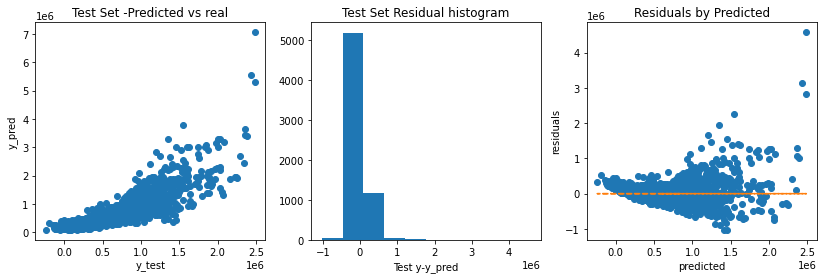

In [2225]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train) 


y_pred=model.predict(X_test_scaled)   # model prediction
y_pred_train=model.predict(X_train_scaled)


result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})


# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [2226]:
print('MSE test: ',  mse(y_test,y_pred))
print('MAE test: ', mae(y_test,y_pred))
print('MSE train: ', mse(y_train,y_pred_train))
print('RMSE test: ', np.sqrt(mae(y_test,y_pred)))
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print('R2_test: ', R2_test)
print('R2_train: ', R2_train)

print('MSE train - MSE test: ', mse(y_train,y_pred_train) - mse(y_test,y_pred) )
print('R2_test/R2_train: ', R2_test/R2_train )
Adj_R2= 1 - (1-R2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adj_R2:', Adj_R2)

MSE test:  35606629840.41175
MAE test:  110375.45119032783
MSE train:  34484256123.54276
RMSE test:  332.2280108454551
R2_test:  0.7353670311260931
R2_train:  0.7448060851839684
MSE train - MSE test:  -1122373716.868988
R2_test/R2_train:  0.987326830102974
Adj_R2: 0.7323894449784261


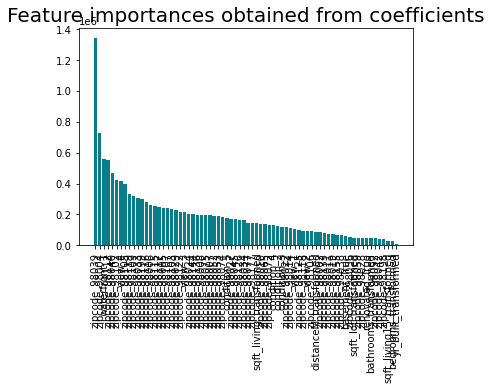

In [2227]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [2260]:
features_importances #.nlargest(30, 'Importance')

,Attribute,Importance
36,zipcode_98039,1.343192e+06
19,zipcode_98004,7.266186e+05
9,waterfront_1,5.606100e+05
56,zipcode_98112,5.545747e+05
37,zipcode_98040,4.670460e+05
...,...,...
38,zipcode_98042,4.069478e+04
70,zipcode_98198,3.764002e+04
3,sqft_living15_transformed,2.678733e+04
4,bedrooms_transformed,2.629090e+04


In [2229]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     609.2
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:00:44   Log-Likelihood:            -2.0463e+05
No. Observations:               15101   AIC:                         4.094e+05
Df Residuals:                   15028   BIC:                         4.100e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.601e+05    4.1e+04      6.341      0.0

## Visualizing results:

Zip-code showed to be very determining for prices. The zipcode 98039 showed to show the highest price effect.

In [2238]:
avg_grouped_by_zipcode = hp_df_org.groupby('zipcode').mean()

In [2243]:
avg_grouped_by_zipcode.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [2244]:
avg_grouped_by_zipcode.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price',
       'distanceM'],
      dtype='object')

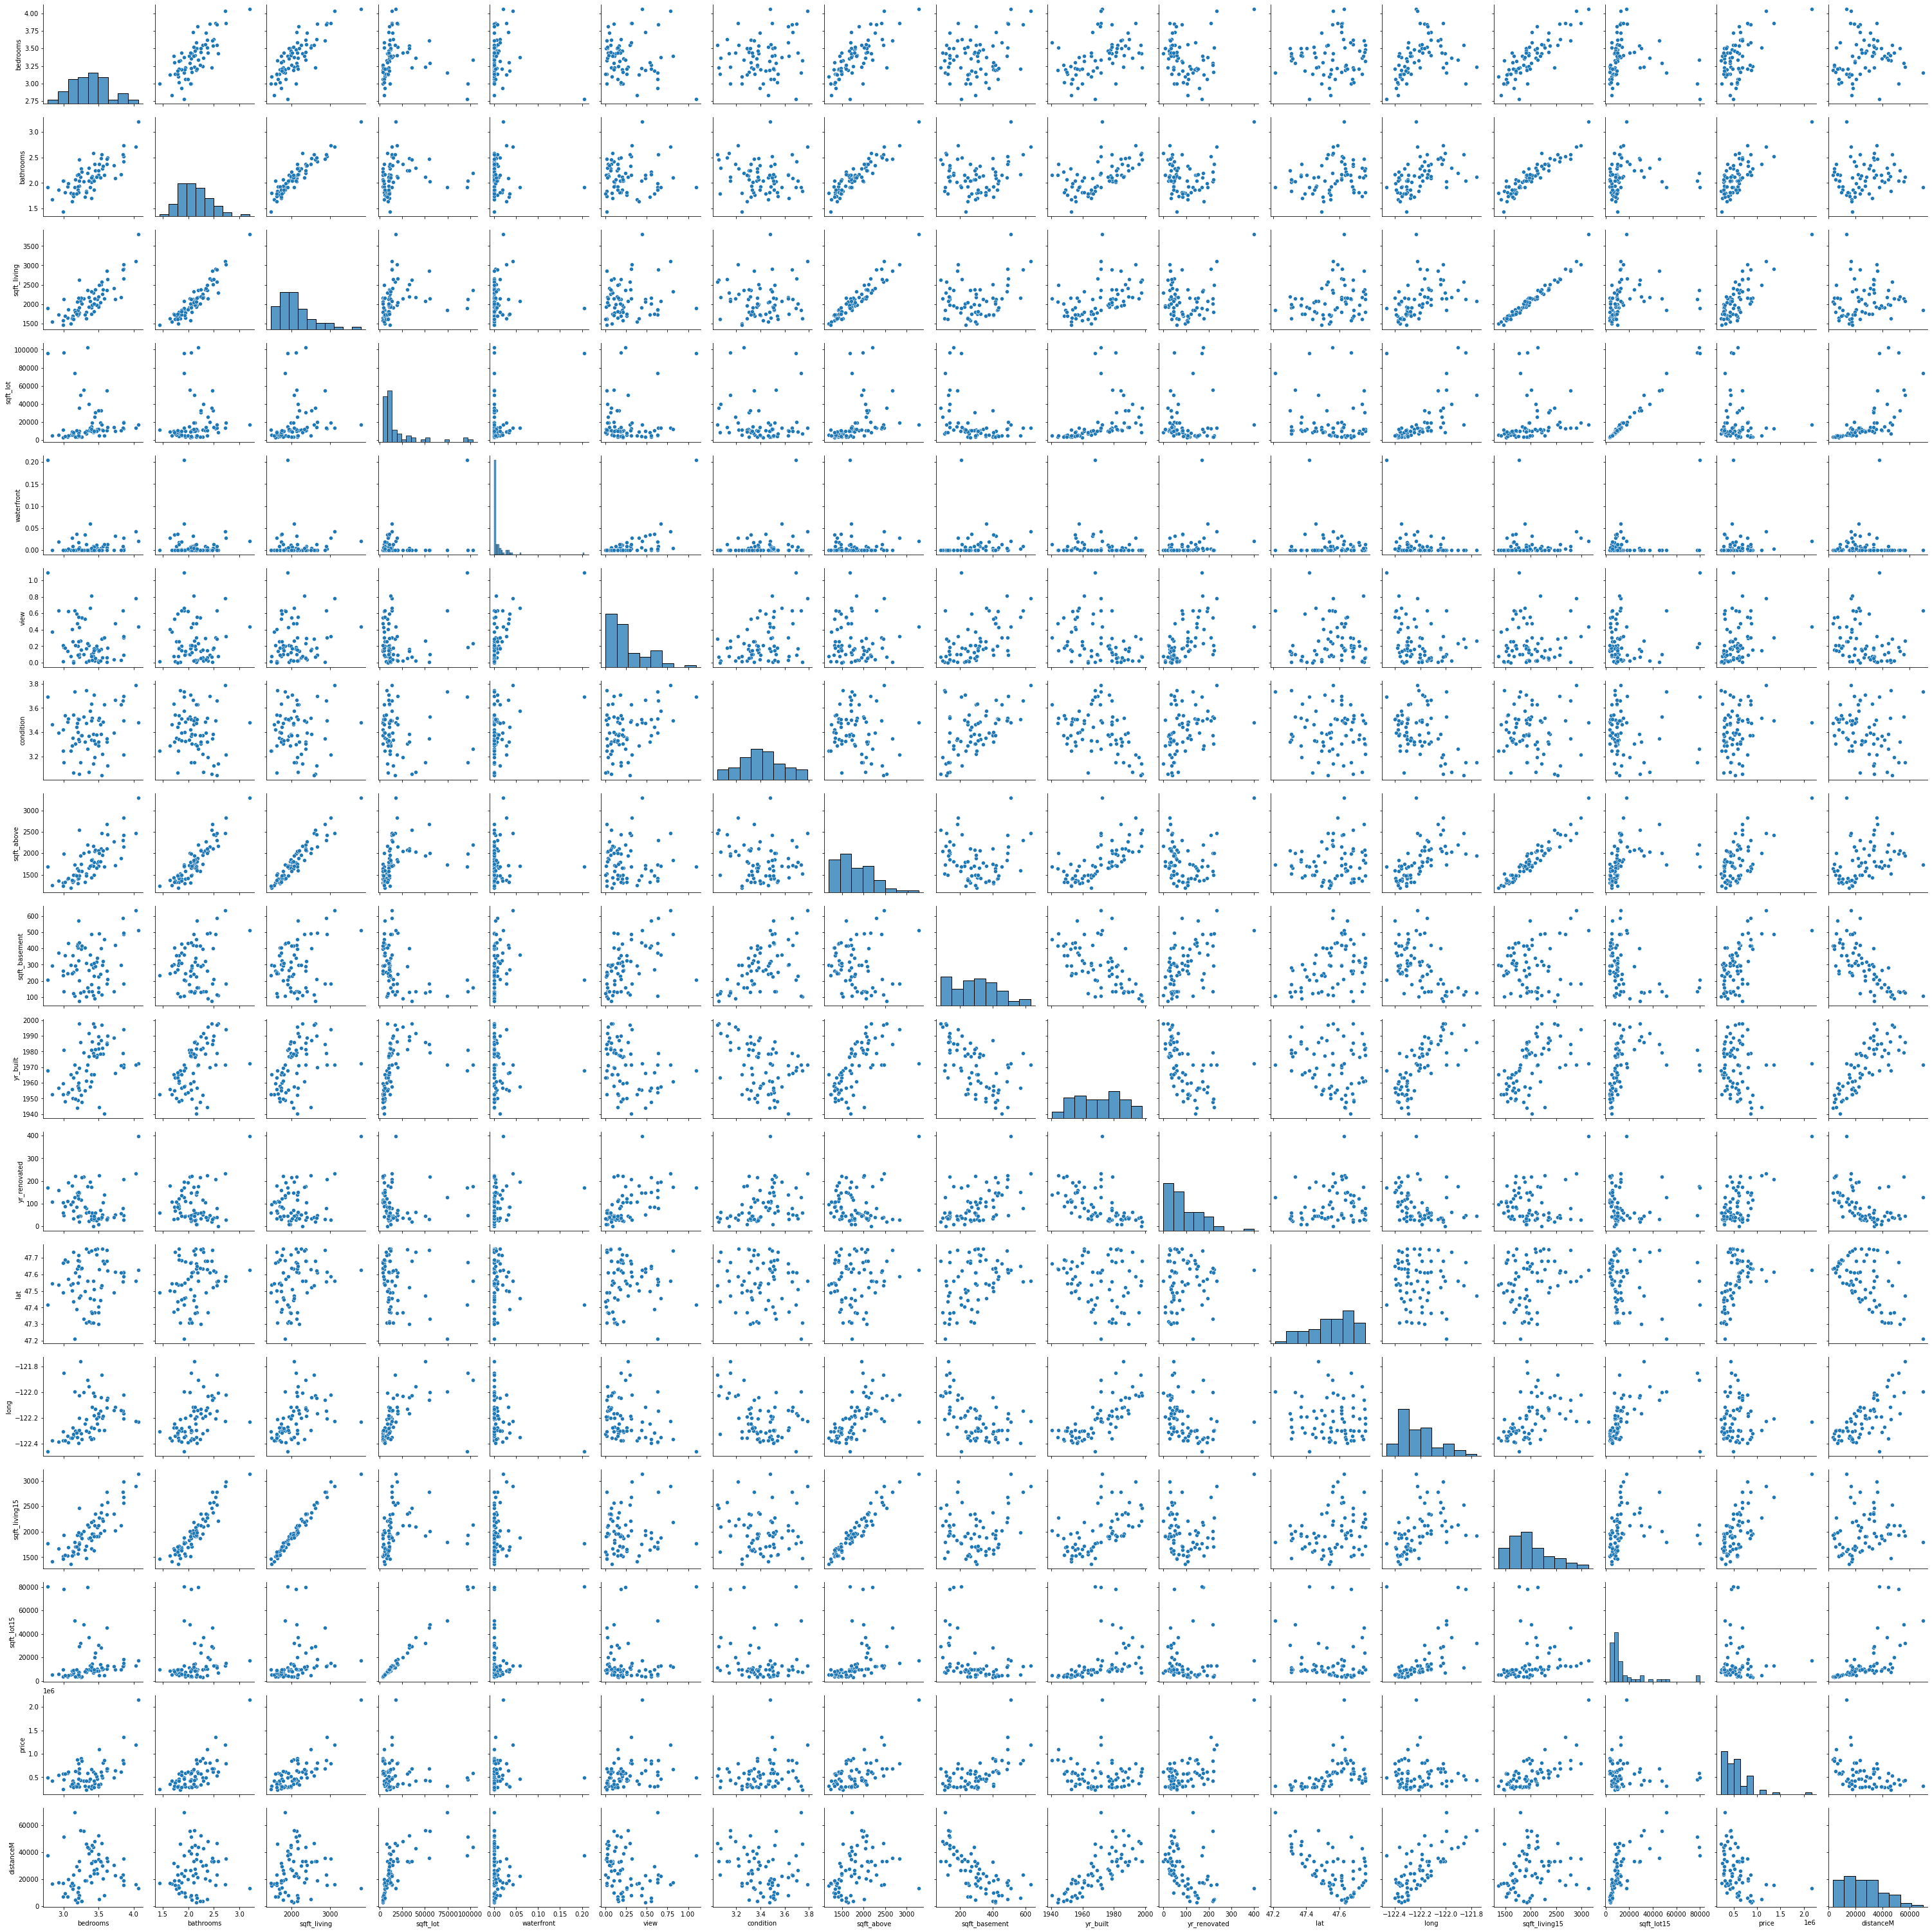

In [2245]:
sns.pairplot(avg_grouped_by_zipcode)

<AxesSubplot:xlabel='long', ylabel='lat'>

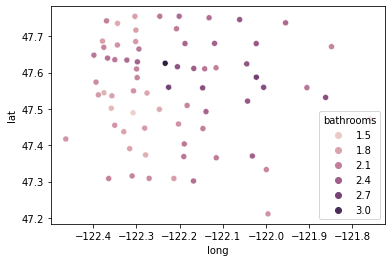

In [2247]:
sns.scatterplot(data=avg_grouped_by_zipcode, x='long', y='lat', hue='bathrooms')

<AxesSubplot:xlabel='long', ylabel='lat'>

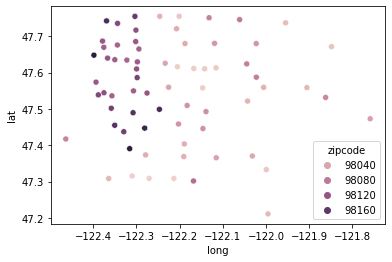

In [2250]:
sns.scatterplot(data=avg_grouped_by_zipcode, x='long', y='lat', hue='zipcode')

Filtering for postcode with biggest influence: 98039

In [2252]:
zipcode98039 = hp_df_org[hp_df_org['zipcode']==98039]

<AxesSubplot:xlabel='long', ylabel='lat'>

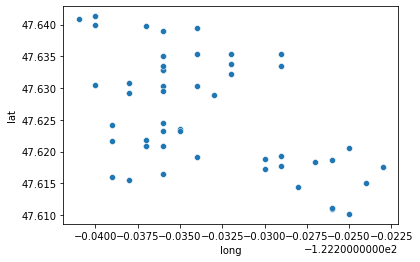

In [2271]:
sns.scatterplot(data=zipcode98039, x='long', y='lat')

In [2254]:
zipcode98004 = hp_df_org[hp_df_org['zipcode']==98004]

In [2255]:
waterfront1 = hp_df_org[hp_df_org['waterfront']==1]
waterfront1.describe()

,Unnamed: 0,id,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,distanceM
count,163.000000,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02,163.000000
mean,10252.085890,4.490512e+09,3.300613,2.677914,3173.687117,25371.828221,1.0,3.766871,3.533742,2473.042945,700.644172,1962.190184,512.392638,98096.527607,47.537364,-122.281601,2666.349693,22385.104294,1.662524e+06,25667.785276
std,6301.843052,2.873261e+09,1.078035,1.092456,1606.025093,42944.334119,0.0,0.561859,0.739388,1240.439072,792.919972,27.877056,872.405490,59.705586,0.115622,0.124015,823.243364,22589.013566,1.120388e+06,9993.370386
min,49.000000,1.210290e+08,1.000000,0.750000,440.000000,1767.000000,1.0,1.000000,1.000000,440.000000,0.000000,1903.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,2433.000000,2.850000e+05,7007.000000
25%,4384.500000,2.013802e+09,3.000000,2.000000,2060.000000,10851.000000,1.0,4.000000,3.000000,1570.000000,0.000000,1940.500000,0.000000,98040.000000,47.451200,-122.376500,2080.000000,11715.000000,7.600000e+05,19141.500000
50%,10454.000000,3.761100e+09,3.000000,2.500000,2850.000000,17342.000000,1.0,4.000000,3.000000,2180.000000,500.000000,1960.000000,0.000000,98075.000000,47.539500,-122.277000,2660.000000,15959.000000,1.400000e+06,24029.000000
75%,15666.000000,7.377700e+09,4.000000,3.250000,3905.000000,26408.000000,1.0,4.000000,4.000000,3085.000000,1245.000000,1986.500000,1959.000000,98155.000000,47.606800,-122.210000,3140.000000,24765.000000,2.215000e+06,31609.500000
max,21560.000000,9.808701e+09,6.000000,6.750000,10040.000000,505166.000000,1.0,4.000000,5.000000,7680.000000,4820.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000,7.060000e+06,68612.000000


<AxesSubplot:xlabel='long', ylabel='lat'>

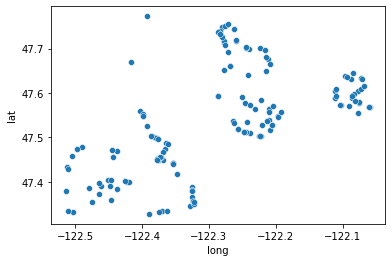

In [2256]:
sns.scatterplot(data=waterfront1, x='long', y='lat')

Get Map background:

In [2259]:
import geopandas
import contextily as cx

ModuleNotFoundError: No module named 'contextily'

In [2268]:
def vplot(df, xax_var, yax_var, split_var):
    '''
    Function to create a violin plot with given variables
    xax_var = 'sales_channel' # Categorical variable to show along the x-axis
    yax_var = 'total_claim_amount' # Numerical Variable to show along the y-axis
    split_var = 'response' #Boolean variable to display on each half of the violins
    '''
    return sns.violinplot(x =df[xax_var],\
                        y = yax_var,\
                        hue=split_var,\
                        data= hp_df_org, split=True)

<AxesSubplot:xlabel='view', ylabel='price'>

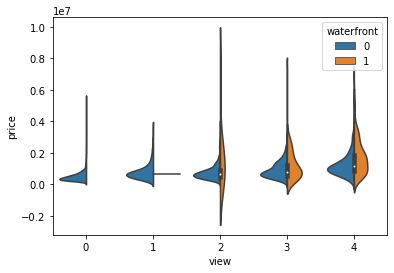

In [2269]:
xax_var = 'view' # Categorical variable to show along the x-axis
yax_var = 'price' # Numerical Variable to show along the y-axis
split_var = 'waterfront' #Boolean variable to display on each half of the violins
vplot(hp_df_org, xax_var, yax_var, split_var)

In [2270]:
xax_var = 'waterfront' # Categorical variable to show along the x-axis
yax_var = 'price' # Numerical Variable to show along the y-axis
split_var = 'view' #Boolean variable to display on each half of the violins
vplot(hp_df_org, xax_var, yax_var, split_var)

ValueError: There must be exactly two hue levels to use `split`.'